In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('./Advertising.csv')

In [5]:
data.head()

,id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.describe()

,id,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Data Preprocessing

In [61]:
data = data.drop("id", axis=1)

In [26]:
#Missing values

data.isnull().sum()

id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [28]:
# Duplicated values

data.duplicated().any()

False

## Exploratory Data Analysis

In [ ]:
# Finding the relation between the feature and taget variables

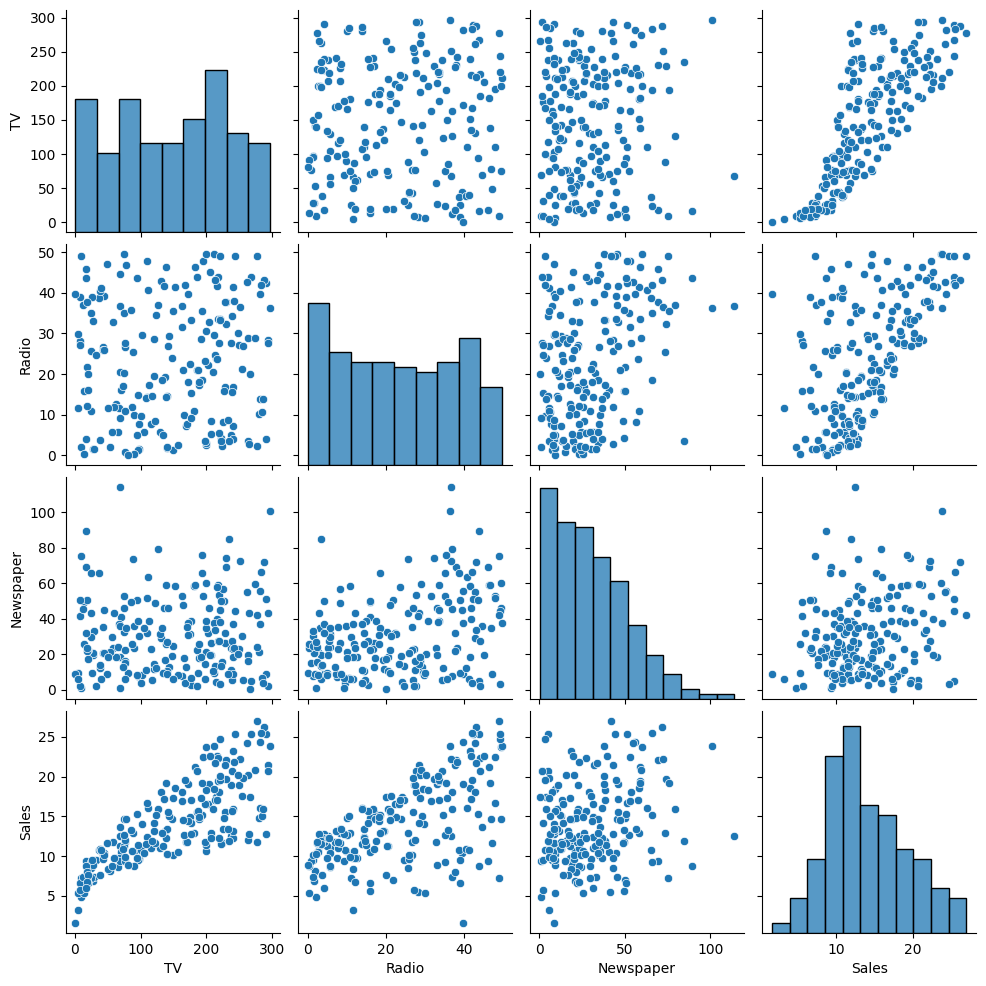

In [62]:
sns.pairplot(data)

In [63]:
data.corr().style.background_gradient()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


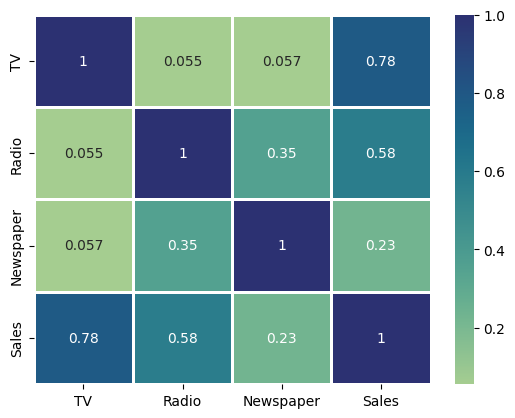

In [64]:
sns.heatmap(data.corr(), annot=True, cmap="crest", linewidth=1);

In [65]:
from scipy import stats

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

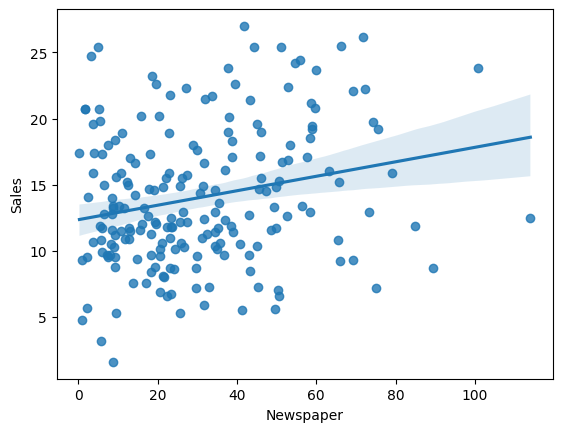

In [66]:
sns.regplot(data=data, x="Newspaper", y="Sales")

Text(0.5, 0.98, 'Visualizing continuous columns')

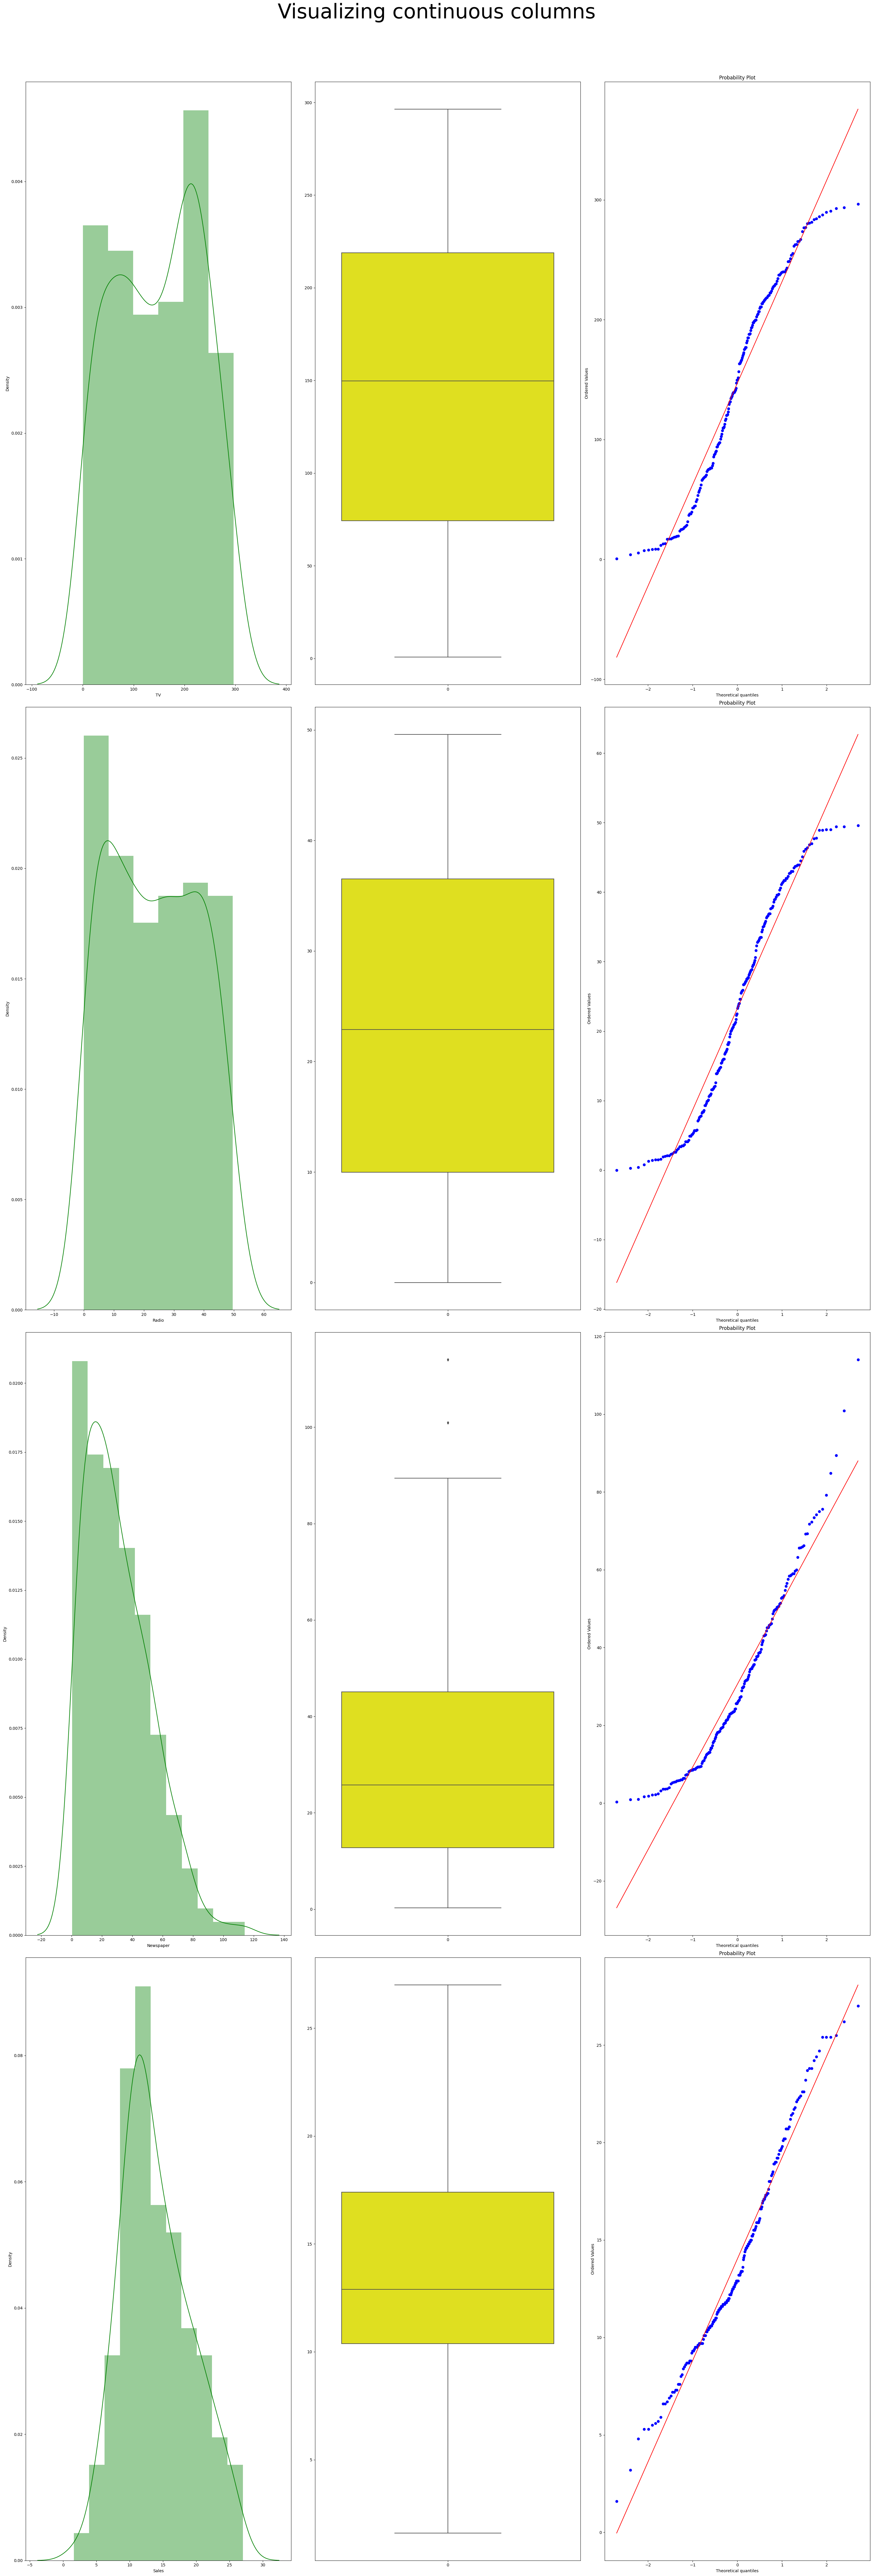

In [67]:
fig,ax = plt.subplots(4,3,figsize=(30,90))
for index,i in enumerate(data.columns):
    sns.distplot(data[i],ax=ax[index,0],color='green')
    sns.boxplot(data[i],ax=ax[index,1],color='yellow')
    stats.probplot(data[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns",fontsize=50)

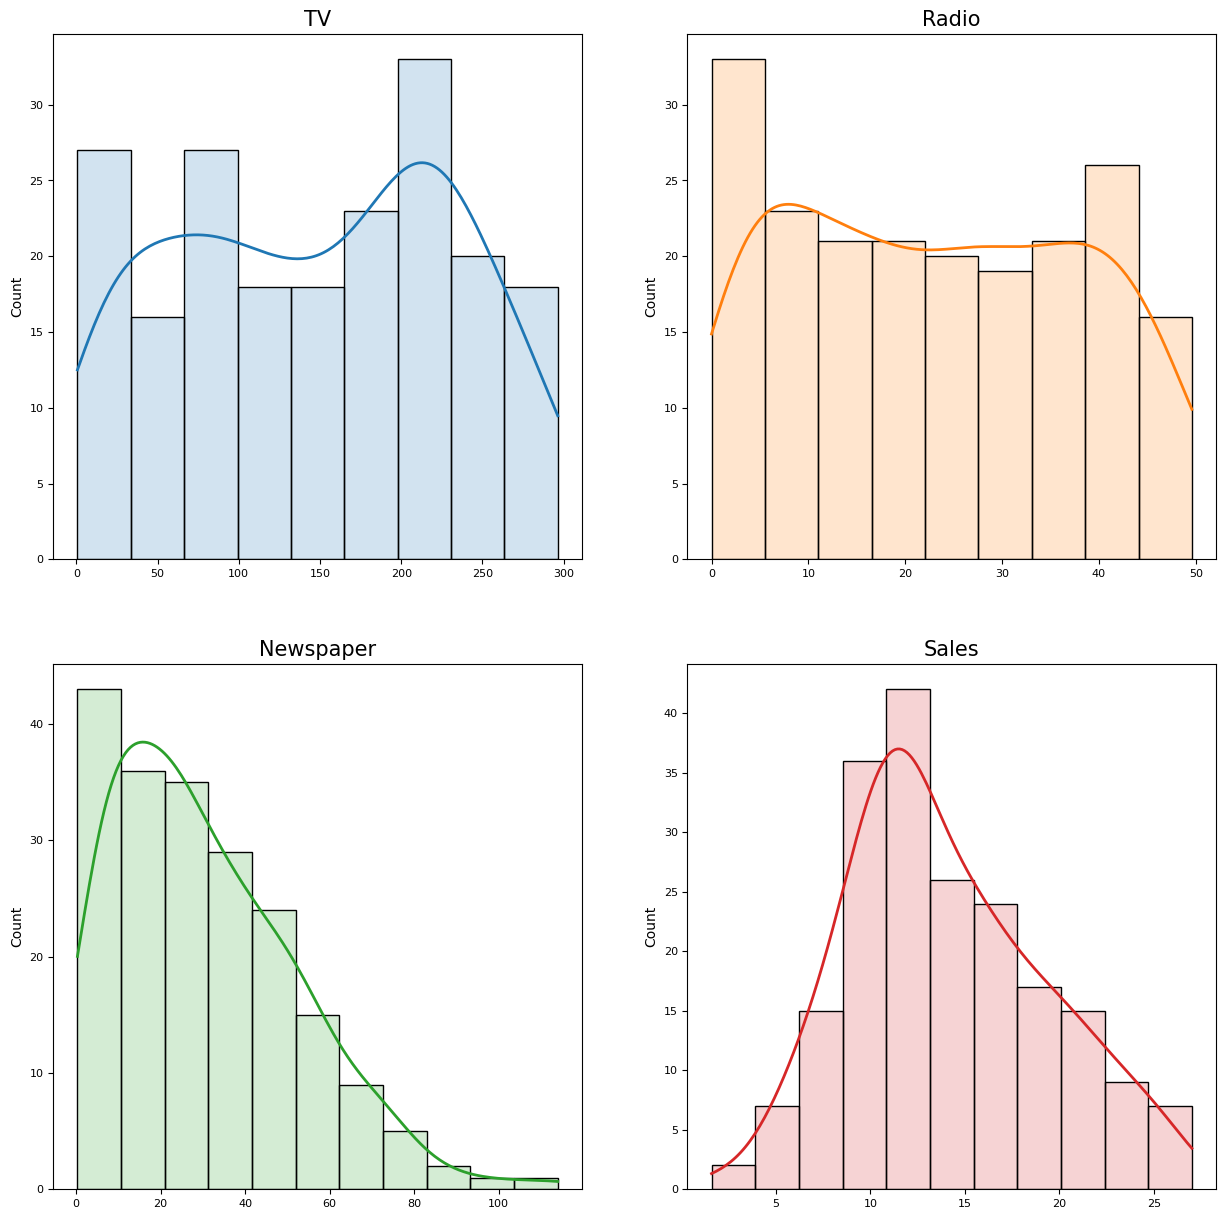

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes = axes.flat
for index, column in enumerate(data):
    sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 2},
        alpha   = 0.2,
        ax      = axes[index]
)
    axes[index].set_title(column, fontsize = 15)
    axes[index].tick_params(labelsize = 8)
    axes[index].set_xlabel('')

In [78]:
y = data.iloc[:, -1]
x = data.iloc[:, :-1]

## Split

In [79]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=True)


## Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(xtrain, ytrain)
ypred = linear.predict(xtest)
ypred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.9224605706201434

In [85]:
trainacc = linear.score(xtrain,ytrain)
testacc = linear.score(xtest,ytest)

In [86]:
trainacc, testacc

(0.8850053786777522, 0.9224605706201434)